# 순전파

## 활성화 함수

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

### 계단 함수

In [3]:
step_function = lambda x: np.array(x > 0, dtype=np.int32)

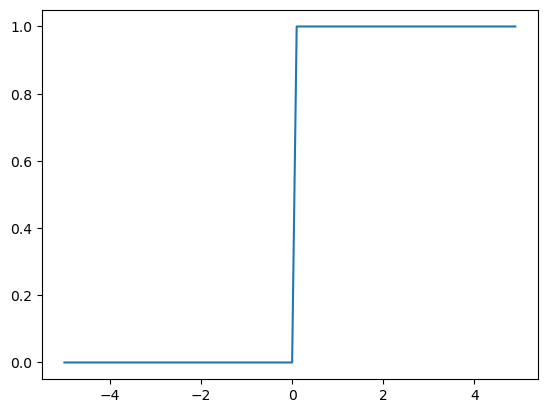

In [4]:
X = np.arange(-5, 5, .1)
y = step_function(X)
plt.plot(X, y)
plt.show()

### Sigmoid 함수

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

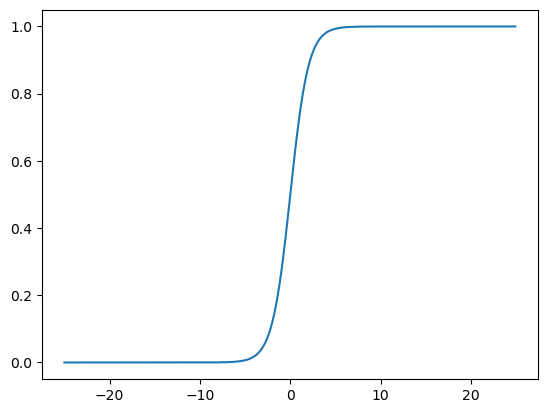

In [6]:
X = np.arange(-25, 25, .1)
y = sigmoid(X)
plt.plot(X, y)
plt.show()

## 순전파 구현

**첫 번째 레이어**

$Z_1 = \sigma(X \cdot W_1) + B_1$
* Size: $(1 \times 3) = (1 \times 2) \cdot (2 \times 3) + (1 \times 3)$

In [7]:
X = np.array([
    [1., .5]
])
W1 = np.array([
    [.1, .3, .5],
    [.2, .4, .6]
])
B1 = np.array([
    [.1, .2, .3]
])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

In [8]:
print('X', X.shape)
print('W1', W1.shape)
print('B1', B1.shape)
print('A1', A1.shape)
print('Z1', Z1.shape)

X (1, 2)
W1 (2, 3)
B1 (1, 3)
A1 (1, 3)
Z1 (1, 3)


In [9]:
print(Z1)

[[0.57444252 0.66818777 0.75026011]]


**두 번째 레이어**

$Z_2 = \sigma(Z_1 \cdot W_2) + B_2$
* Size: $(1 \times 2) = (1 \times 3) \cdot (3 \times 2) + (1 \times 2)$

In [10]:
W2 = np.array([
    [.1, .4],
    [.2, .5],
    [.3, .6]
])
B2 = np.array([
    [.1, .2]
])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

**세 번째 레이어**

$Z_3 = I(Z_2 \cdot W_3) + B_3$
* Size: $(1 \times 2) = (1 \times 2) \cdot (2 \times 2) + (1 \times 2)$

In [11]:
eye = lambda x: x

In [12]:
W3 = np.array([
    [.1, .3],
    [.2, .4]
])
B3 = np.array([
    [.1, .2]
])

A3 = np.dot(Z2, W3) + B3
Z3 = eye(A3)

In [13]:
y = Z3
y

array([[0.31682708, 0.69627909]])

## 순전파 함수화

In [14]:
def init_network():
    network = {}
    network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]])
    network['B1'] = np.array([[.1, .2, .3]])
    network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
    network['B2'] = np.array([[.1, .2]])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['B3'] = np.array([[.1, .2]])
    return network

def forward(network, X):
    A1 = np.dot(X, network['W1']) + network['B1']
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, network['W2']) + network['B2']
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, network['W3']) + network['B3']
    Z3 = eye(A3)
    y = Z3
    return y

network = init_network()
X = np.array([[1., .5]])
y = forward(network, X)
print(y)

[[0.31682708 0.69627909]]
